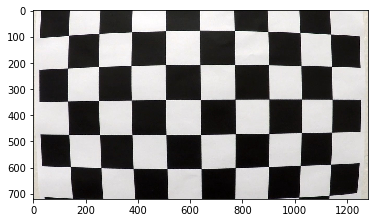

In [50]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

img = mpimg.imread("camera_cal/calibration1.jpg")
plt.imshow(img)

def draw_images(img, undistorted=None, title=None, cmap=None):
    if undistorted is not None:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
    else:
        f, ax1 = plt.subplots(1,1, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=50)
    if undistorted is not None:
        if cmap is not None:
            ax2.imshow(undistorted, cmap=cmap)
        else:
            ax2.imshow(undistorted)
        ax2.set_title(title, fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [58]:
nx = 9  # corners on x axis
ny = 6  # corners on y axis

# prepare object points
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('camera_cal/*.jpg')
imgs = []
for fname in images:
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny),None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        #img = cv2.drawChessboardCorners(img, (7,6), corners,ret)
        imgs.append(img)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
dsts = []
for img in imgs:
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    dsts.append(dst)

In [60]:
for i in range(len(dsts)):
    pass
    #print(i)
    #draw_images(imgs[i], dsts[i])
#plt.show()

## 小习题

校正和透视变形

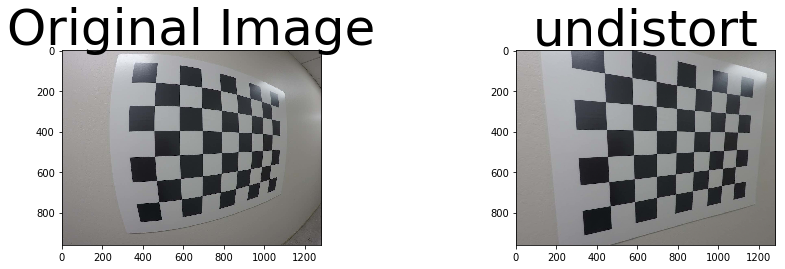

In [97]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 从pickle文件中加载相机矩阵mtx和扭曲系数dist。这些参数可以通过cv2.calibrateCamera()计算获得。见上面的例子。
dist_pickle = pickle.load( open( "pickles/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

img = mpimg.imread('test_images/test_image2.png')
dst = cv2.undistort(img, mtx, dist, None, mtx)
draw_images(img, dst, title='undistort')

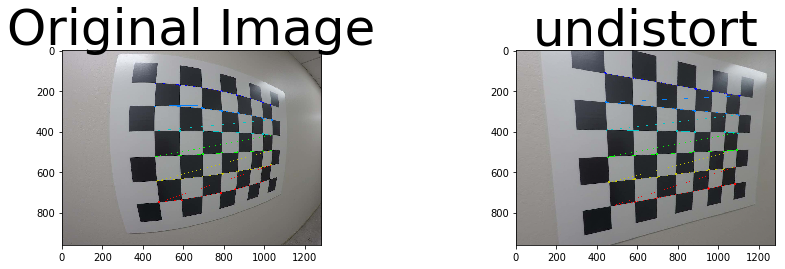

In [98]:
nx = 8
ny = 6
gray = cv2.cvtColor(dst,cv2.COLOR_RGB2GRAY)
gray = np.uint8(gray * 255)
ret1, corners1 = cv2.findChessboardCorners(np.uint8(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) * 255), (nx, ny), None)
ret2, corners2 = cv2.findChessboardCorners(gray, (nx,ny), None)
if ret1 and ret2:
    corner_img = cv2.drawChessboardCorners(img, (nx, ny), corners1, ret)
    corner_dst = cv2.drawChessboardCorners(dst, (nx, ny), corners2, ret)
    draw_images(corner_img, corner_dst, title='undistort')

(4, 2)
[[  436.51940918   114.33944702]
 [ 1103.90649414   224.6287384 ]
 [  465.41986084   768.55310059]
 [ 1075.54748535   657.98187256]]
(4, 2)
[[  436.   114.]
 [ 1103.   114.]
 [  436.   657.]
 [ 1103.   657.]]
[[[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  ..., 
  [ 0.7329762   0.75978386  0.78234816]
  [ 0.73094928  0.75818586  0.78139365]
  [ 0.72937334  0.75674778  0.78027725]]

 [[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  ..., 
  [ 0.72998607  0.7570129   0.77990609]
  [ 0.72815037  0.75555539  0.7790159 ]
  [ 0.72668421  0.75409108  0.77762049]]

 [[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  ..., 
  [ 0.7275579   0.75459051  0.77749228]
  [ 0.72651452  0.75396544  0.77749491]
  [ 0.725779    0.75322998  0.77675939]]

 ..., 
 [[ 0.          0.         

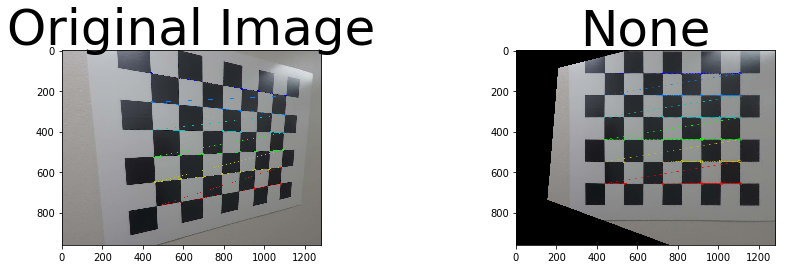

In [120]:
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)
src_points = np.float32([corners2[0][0],corners2[7][0],corners2[40][0],corners2[47][0]])
print(src_points.shape)
print(src_points)
dst_points = np.float32([[436,114],
 [1103,114],
 [436,657],
 [1103,657]])
print(dst_points.shape)
print(dst_points)
M = cv2.getPerspectiveTransform(src_points, dst_points)
p_img = cv2.warpPerspective(corner_dst, M, dsize=(corner_dst.shape[1], corner_dst.shape[0]), flags=cv2.INTER_LINEAR|cv2.WARP_FILL_OUTLIERS)
print(p_img)
draw_images(corner_dst, p_img)

In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "pickles/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('test_images/test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    # 2) Convert to grayscale
    # 3) Find the chessboard corners
    # 4) If corners found: 
            # a) draw corners
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            # e) use cv2.warpPerspective() to warp your image to a top-down view
    #delete the next two lines
    offset=100
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    gray = cv2.cvtColor(dst,cv2.COLOR_BGR2GRAY)
    
    img_size = (gray.shape[1], gray.shape[0])
    ret2, corners2 = cv2.findChessboardCorners(gray, (nx,ny), None)
    print(ret2)
    if ret2:
        cv2.drawChessboardCorners(dst, (nx, ny), corners2, ret2)
        src_points = np.float32([corners2[0][0], corners2[nx-1][0], corners2[-1][0], corners2[-nx][0]])
        dst_points = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        print(src_points)
        print(dst_points)
        M = cv2.getPerspectiveTransform(src_points, dst_points)
        p_img = cv2.warpPerspective(dst, M, dsize=img_size)
        #print(p_img)
        return p_img, M
    return None, None

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

True
[[  436.50704956   114.33557129]
 [ 1103.99841309   224.66326904]
 [ 1075.51147461   658.02740479]
 [  465.32727051   768.5894165 ]]
[[  100.   100.]
 [ 1180.   100.]
 [ 1180.   860.]
 [  100.   860.]]
